# Import Library

In [ ]:
# import require library for preprocess
import mne
import numpy as np
from mne.channels import make_standard_montage
import matplotlib.pyplot as plt
from mne.datasets import eegbci
from mne.preprocessing import ICA   

# Load Data

In [22]:
# read biosemi file (bdf)
# raw = mne.io.read_raw_bdf("C:\\Users\\pipo_\\OneDrive\\Desktop\\neuromedia\\Gruop5_task1.bdf", preload=True, verbose=False) 
raw = mne.io.read_raw_fif("Attention_data.fif", preload=True, verbose=False)
eegbci.standardize(raw)
montage = make_standard_montage("biosemi64")
raw.set_montage(montage, on_missing='ignore')

C:\Users\pipo_\AppData\Local\Temp\ipykernel_33944\1352877513.py:3: RuntimeWarning: This filename (Attention_data.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif("Attention_data.fif", preload=True, verbose=False)


<Raw | Attention_data.fif, 73 x 77056 (301.0 s), ~43.0 MB, data loaded>

# Filter

In [23]:
#Band pass and notch filter
raw_reref = mne.set_eeg_reference(raw, ref_channels=['EXG1', 'EXG2'])

raw = raw_reref[0].copy().notch_filter(freqs=50)
raw = raw.copy().filter(l_freq=1, h_freq=40, verbose = False)

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s


# ICA with Raw data

In [24]:
raw_EEG = raw.copy().pick_channels(ch_names= raw.ch_names[0:64])
raw_Other = raw.copy().pick_channels(ch_names= raw.ch_names[64:])

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [1]:
ica = ICA(n_components=64, max_iter=50, random_state=97, method='fastica')
ica.fit(raw_EEG)
ica


KeyboardInterrupt



In [26]:
from mne_icalabel import label_components
ic_labels = label_components(raw_EEG, ica, method="iclabel")
ic_labels

C:\Users\pipo_\AppData\Local\Temp\ipykernel_33944\2330837181.py:2: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(raw_EEG, ica, method="iclabel")
C:\Users\pipo_\AppData\Local\Temp\ipykernel_33944\2330837181.py:2: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended infomax ICA decompositions. To use the extended infomax algorithm, use the 'mne.preprocessing.ICA' instance with the arguments 'ICA(method='infomax', fit_params=dict(extended=True))' (scikit-learn) or 'ICA(method='picard', fit_params=dict(ortho=False, extended=True))' (python-picard).
  ic_labels = label_components(raw_EEG, ica, method="iclabel")


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


{'y_pred_proba': array([0.9899019 , 0.8352013 , 0.8666818 , 0.913967  , 0.9042614 ,
        0.51679295, 0.83029854, 0.59297425, 0.8046473 , 0.86554426,
        0.390407  , 0.70146   , 0.6673132 , 0.59461707, 0.91732615,
        0.9769983 , 0.5895865 , 0.9466526 , 0.69841135, 0.95384336,
        0.6499874 , 0.9007364 , 0.7389778 , 0.93346405, 0.9573998 ,
        0.8990649 , 0.96235204, 0.53865397, 0.9421878 , 0.74539506,
        0.961442  , 0.60215694, 0.9583545 , 0.5397333 , 0.9273156 ,
        0.679031  , 0.8094822 , 0.7672694 , 0.886794  , 0.9257193 ,
        0.93050003, 0.7381248 , 0.8501891 , 0.96041477, 0.967128  ,
        0.92235786, 0.5522131 , 0.40631947, 0.5377087 , 0.802944  ,
        0.7721139 , 0.6361702 , 0.9519499 , 0.79688656, 0.8832475 ,
        0.90025413, 0.7277553 , 0.87278795, 0.4628519 , 0.83966833,
        0.86885786, 0.8739999 , 0.56745684, 0.7993468 ], dtype=float32),
 'labels': ['eye blink',
  'other',
  'other',
  'eye blink',
  'heart beat',
  'other',
  'oth

In [27]:
keep_components = ["brain", "other"]

exclude_idx = []

for idx, label in enumerate(ic_labels['labels']):
    if label not in keep_components:
        exclude_idx.append(idx)
    if idx <= 5 and label == "other": #remove suspect "other" components
        exclude_idx.append(idx)
        

if exclude_idx == []:
    exclude_idx = [0]

print(exclude_idx)



[0, 1, 2, 3, 4, 5, 47, 49, 54, 55, 62]


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
150 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
150 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
150 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
150 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
150 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
150 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
150 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
150 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
150 matching events found
No baseline correction applied
0 pro

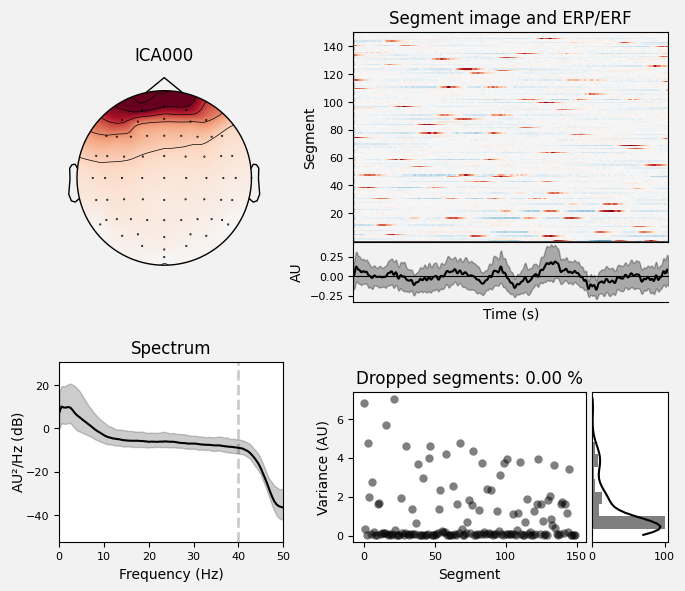

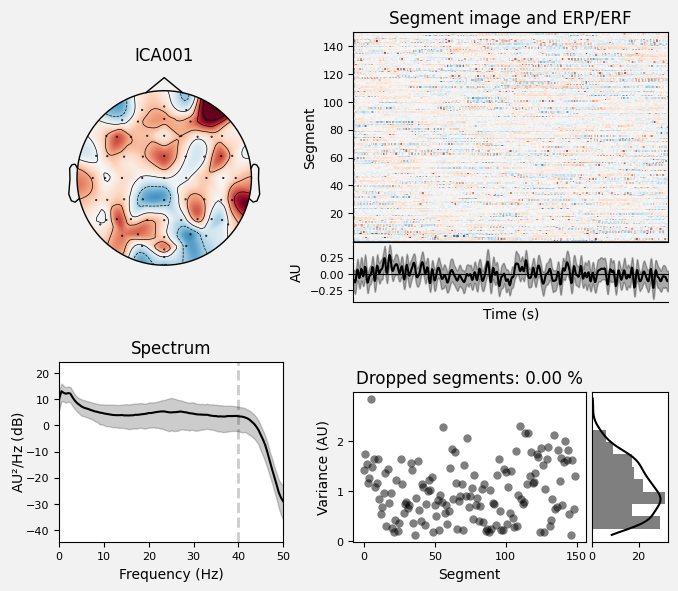

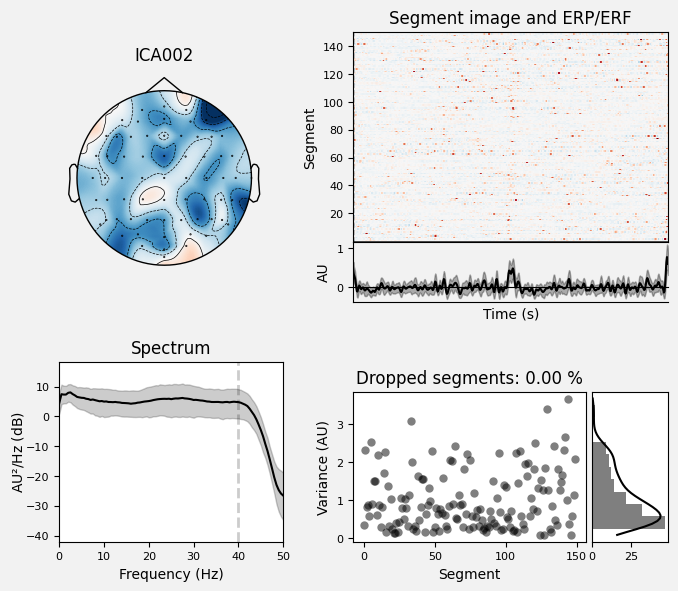

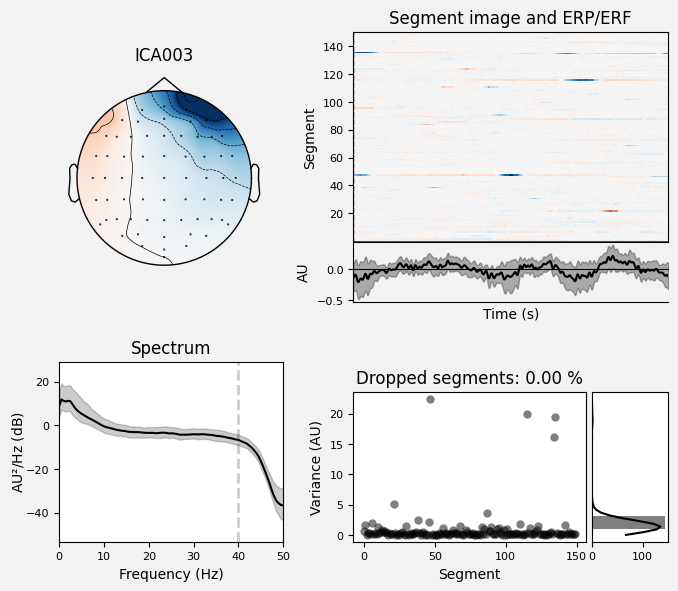

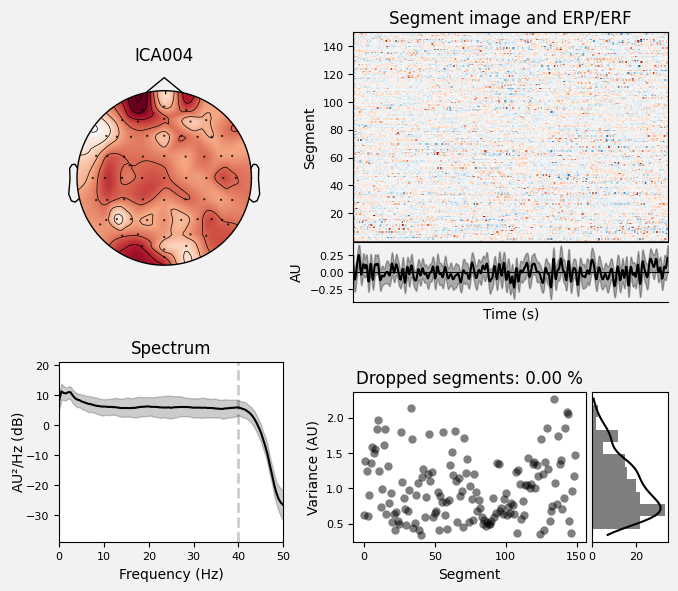

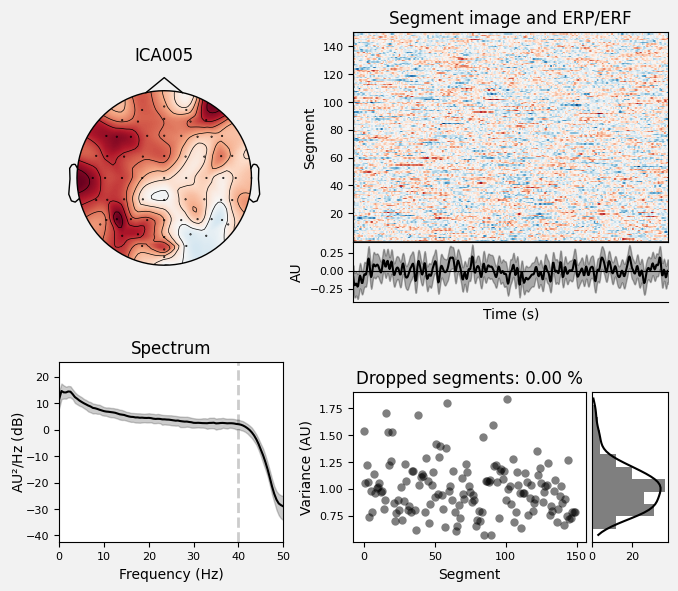

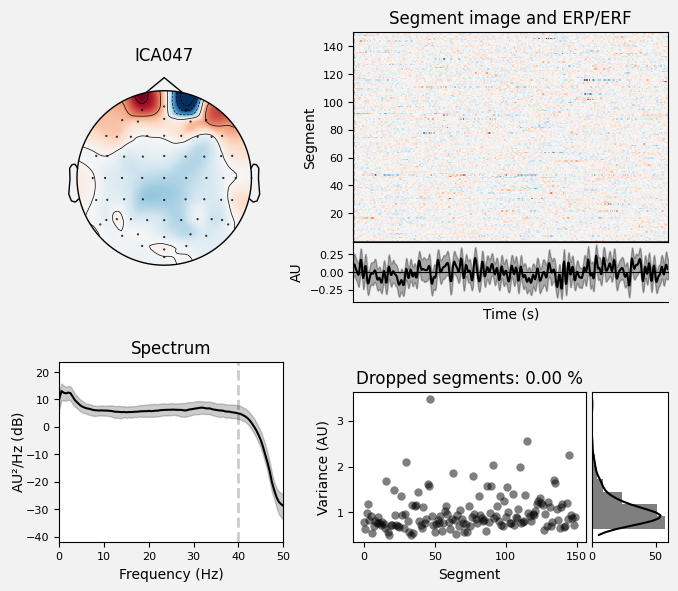

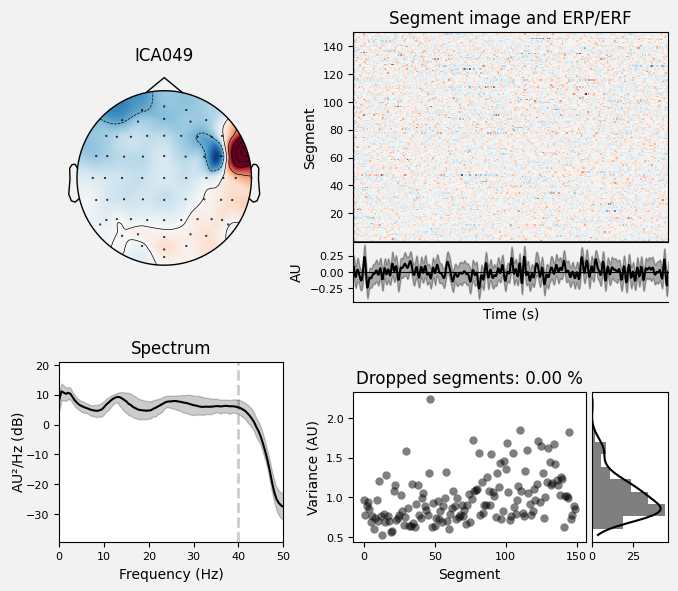

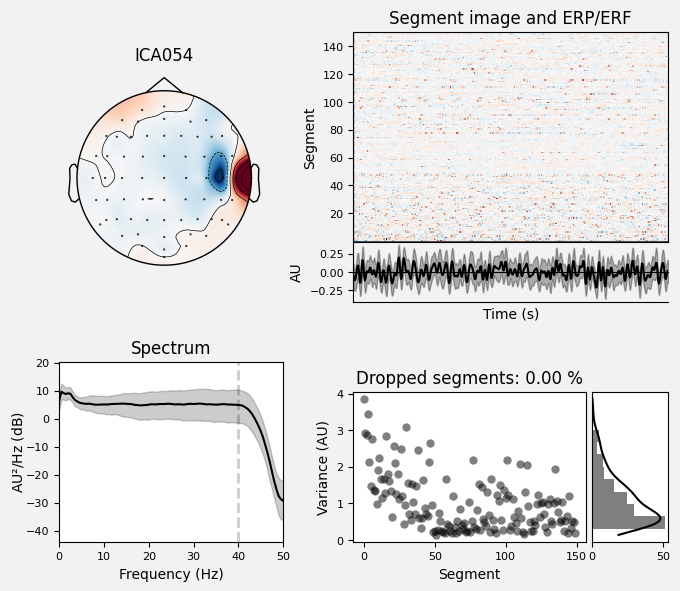

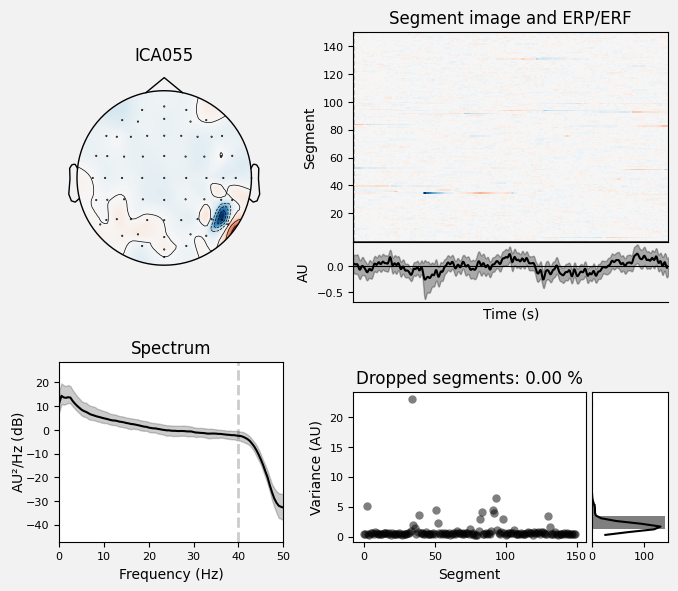

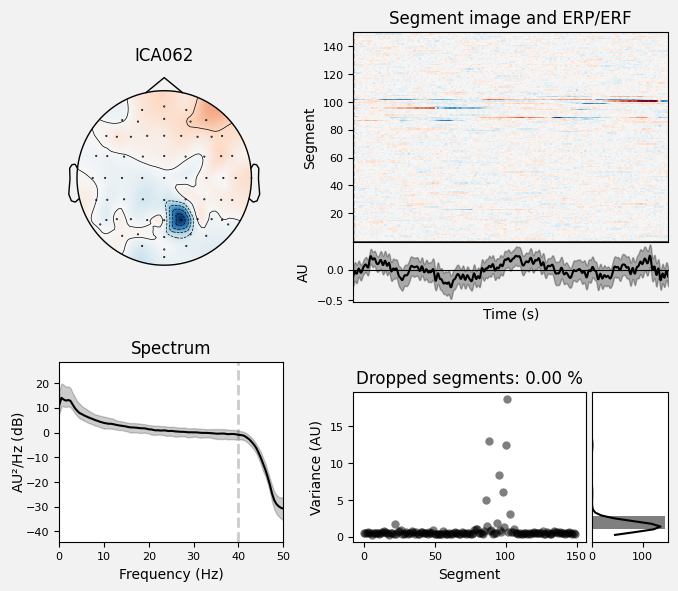

In [28]:
ica.plot_properties(raw_EEG, picks=exclude_idx)
plt.show()

Creating RawArray with float64 data, n_channels=64, n_times=77056
    Range : 0 ... 77055 =      0.000 ...   300.996 secs
Ready.


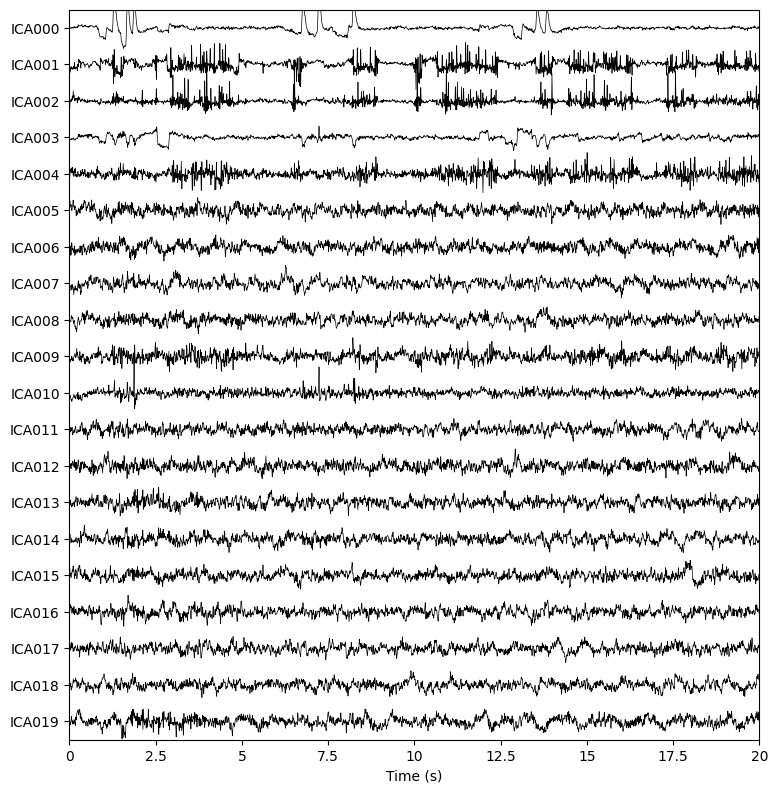

...


In [29]:
ica.plot_sources(raw_EEG, show_scrollbars=False)
print("...")

In [30]:
ICA_cleaned = ica.apply(raw_EEG ,exclude=exclude_idx)

Applying ICA to Raw instance
    Transforming to ICA space (64 components)
    Zeroing out 11 ICA components
    Projecting back using 64 PCA components


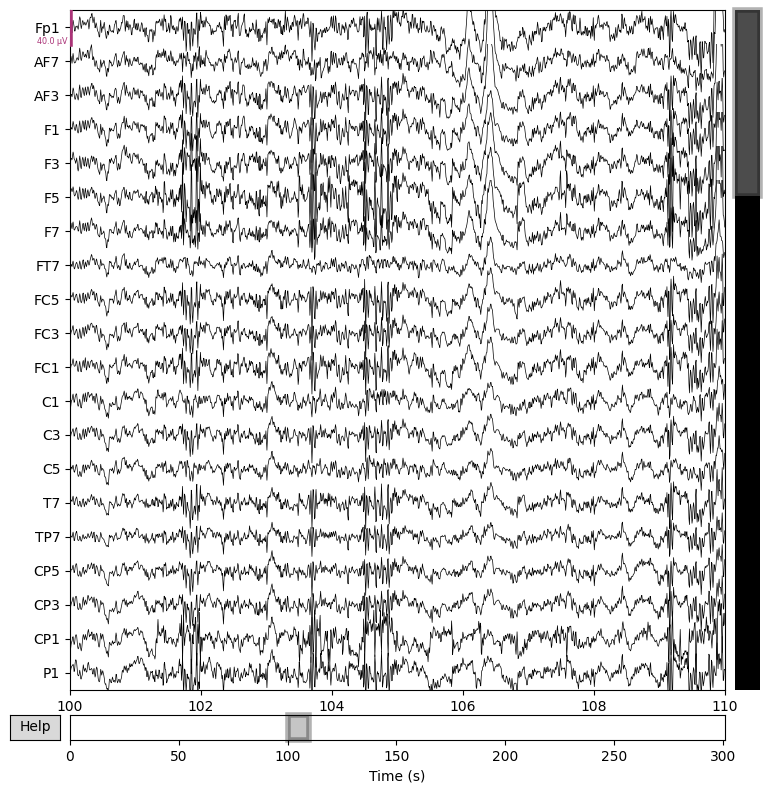

...


In [31]:
raw.plot(start = 100)
print("...")

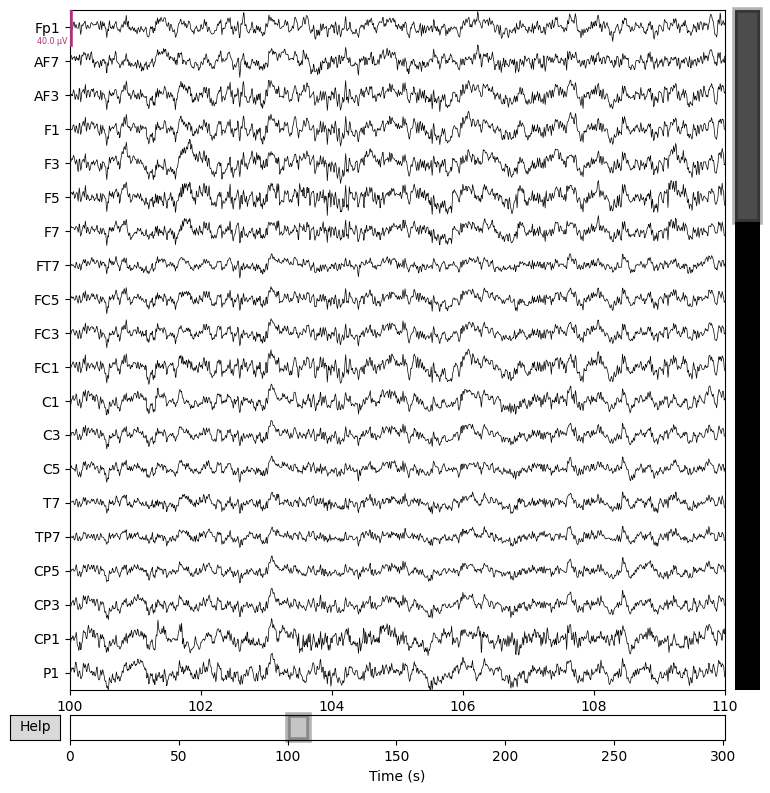

...


In [32]:
ICA_cleaned.plot(start = 100)
print("...")

# Car driving Attention task 

## Epoching

In [33]:
sampling_rate = raw.info['sfreq']
seconds_per_trial = 10
possible_trials = int(ICA_cleaned.get_data().shape[1] // (sampling_rate * seconds_per_trial))

ev = [i*sampling_rate*seconds_per_trial for i in range(possible_trials)] 

events_labels = np.ones(possible_trials, dtype=int)

events = np.column_stack((np.array(ev, dtype = int),
                        np.zeros(possible_trials, dtype = int),
                        np.array(events_labels, dtype = int))) 

Epochs_EEG =  mne.Epochs(ICA_cleaned, events, tmin = 0, tmax=seconds_per_trial, baseline=None, preload= True)

selected_channels = ['Fp1', 'F3', 'C3', 'Fp2', 'Fz', 'F4', 'Cz', 'C4']

Epochs_EEG = Epochs_EEG.pick_channels(selected_channels)

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 2561 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [34]:
Epochs_EEG.ch_names

['Fp1', 'F3', 'C3', 'Fp2', 'Fz', 'F4', 'Cz', 'C4']

# Feature extraction

In [35]:
# Compute PSD and extract theta/beta power for each epoch using Epochs' built-in compute_psd method
def compute_theta_beta_ratio(Epochs):
    # Define theta and beta band ranges
    theta_band = (4, 7)
    beta_band = (12, 30)
    alpha_band = (8, 11)
    # Specify left and right hemisphere electrodes
    left_channels = ['F3', 'Fp1']
    right_channels = ['F4', 'Fp2']
    # Get indices for the selected channels
    left_idx = [Epochs.ch_names.index(ch) for ch in left_channels]
    right_idx = [Epochs.ch_names.index(ch) for ch in right_channels]

    print(left_idx, right_idx)
    
    # Compute PSD using Epochs' built-in compute_psd method
    psds, freqs = Epochs.compute_psd(fmin=1.0, fmax=40.0, verbose=False).get_data(return_freqs=True)

    # # Compute power in theta and beta bands for each epoch
    theta_power = np.mean(psds[:, :, (freqs >= theta_band[0]) & (freqs <= theta_band[1])], axis=2)
    beta_power = np.mean(psds[:, :, (freqs >= beta_band[0]) & (freqs <= beta_band[1])], axis=2)
    alpha_power = np.mean(psds[:, :, (freqs >= alpha_band[0]) & (freqs <= alpha_band[1])], axis=2)

    left_alpha_power = alpha_power[:,left_idx]
    right_alpha_power = alpha_power[:,right_idx]

    asymmetry_scores = right_alpha_power-left_alpha_power
    
    # Compute theta/beta ratio
    theta_beta_ratio = theta_power/beta_power
    
    return asymmetry_scores,theta_beta_ratio


# 1. Show theta/beta ratio across time

[1, 0] [5, 3]


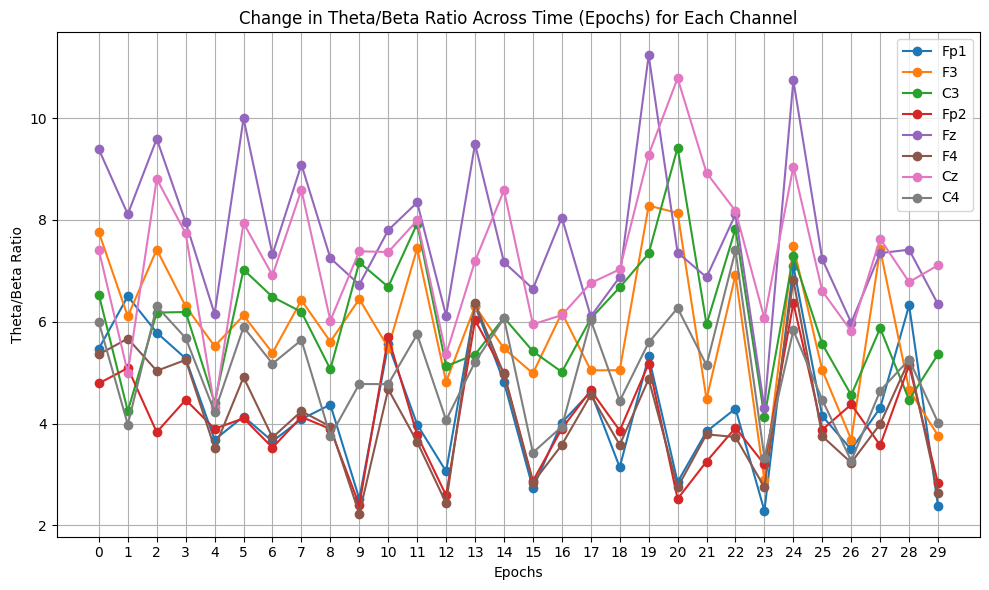

In [36]:
# Compute Theta/Beta ratio across epochs
asymmetry_scores, theta_beta_ratios = compute_theta_beta_ratio(Epochs_EEG)

# Create a time-series plot of theta/beta ratio across epochs for each channel
plt.figure(figsize=(10, 6))

# Iterate over each channel and plot the theta/beta ratio for that channel
for ch_idx, channel in enumerate(Epochs_EEG.ch_names):
    plt.plot(theta_beta_ratios[:, ch_idx], marker='o', linestyle='-', label=channel)

# Customize the plot
plt.title('Change in Theta/Beta Ratio Across Time (Epochs) for Each Channel')
plt.xlabel('Epochs')
plt.ylabel('Theta/Beta Ratio')
plt.xticks(np.arange(0, possible_trials))
plt.grid(True)
plt.legend(loc='upper right')  # Show legend with channel names
plt.tight_layout()

# Display the plot
plt.show()

# 2. Show asymmetry_scores across time

[1, 0] [5, 3]


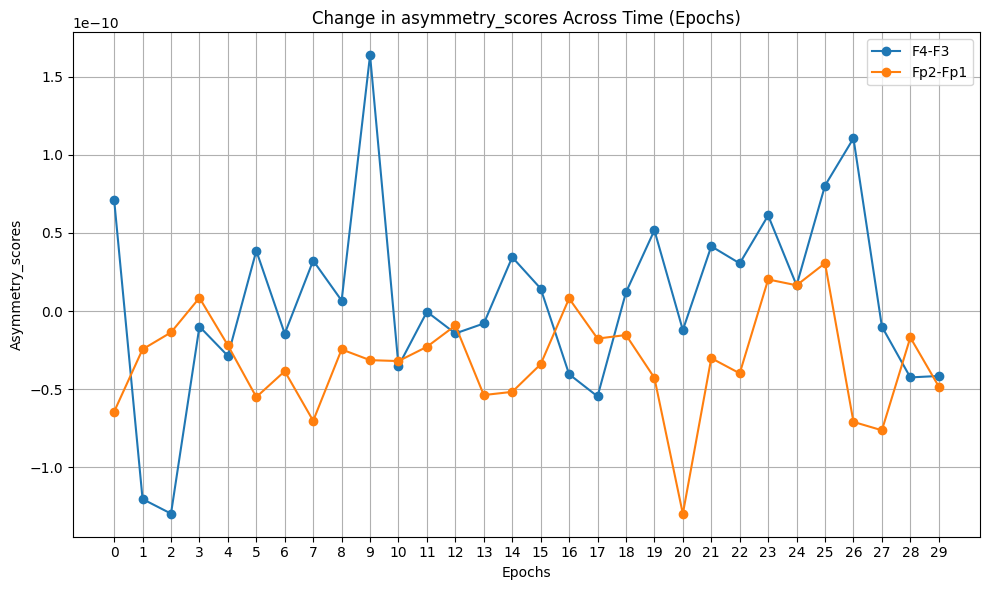

In [37]:
# Compute Theta/Beta ratio across epochs
asymmetry_scores, theta_beta_ratios = compute_theta_beta_ratio(Epochs_EEG)

# Create a time-series plot of theta/beta ratio across epochs for each channel
plt.figure(figsize=(10, 6))

asymmetry_channels = ['F4-F3', 'Fp2-Fp1']

# Iterate over each channel and plot the theta/beta ratio for that channel
for ch_idx, channel in enumerate(asymmetry_channels):
    plt.plot(asymmetry_scores[:, ch_idx], marker='o', linestyle='-', label=channel)

# Customize the plot
plt.title('Change in asymmetry_scores Across Time (Epochs)')
plt.xlabel('Epochs')
plt.ylabel('Asymmetry_scores')
plt.xticks(np.arange(0, possible_trials))
plt.grid(True)
plt.legend(loc='upper right')  # Show legend with channel names
plt.tight_layout()

# Display the plot
plt.show()

## plot to Excel

In [38]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Create a DataFrame for theta/beta ratios
# df_ratios = pd.DataFrame(asymmetry_scores, columns=asymmetry_channels)
# df_ratios.index.name = 'Epoch'
# df_ratios.reset_index(inplace=True)

# # Prepare metadata
# metadata = {
#     'Title': ['Change in Theta/Beta Ratio Across Time (Epochs) for Each Channel'],
#     'X-axis Label': ['Epochs'],
#     'Y-axis Label': ['Theta/Beta Ratio'],
#     'Grid': [True],
#     'Legend': ['Channel Names'],
# }

# # Convert metadata to DataFrame
# df_metadata = pd.DataFrame(metadata)

# # Save to Excel
# excel_file = "theta_beta_ratios_plot_data2.xlsx"
# with pd.ExcelWriter(excel_file) as writer:
#     df_ratios.to_excel(writer, sheet_name='Theta_Beta_Ratios', index=False)
#     df_metadata.to_excel(writer, sheet_name='Plot_Metadata', index=False)

# print(f"Data and metadata have been saved to {excel_file}")